# Tutorial Explore (Dynamical Model)

Play around with the dataset in the tutorial. Tutorial here https://scvelo.readthedocs.io/VelocityBasics.html.

In [1]:
import scvelo as scv
import scanpy as sc
from matplotlib import rcParams
import numpy as np
scv.logging.print_version()

SURAG CHANGED utils.py
Running scvelo 0.2.2 (python 3.8.2) on 2020-10-11 05:26.


In [2]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

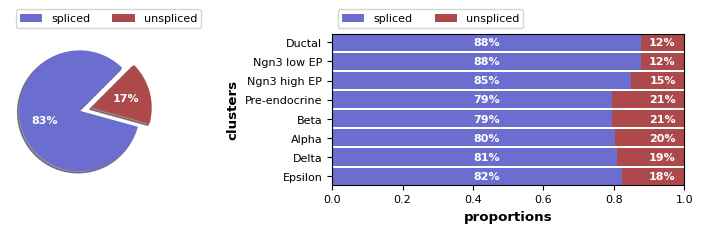

In [3]:
scv.pl.proportions(adata)

In [3]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:15:40) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [6]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [5]:
scv.tl.velocity_graph(adata)

SURAG UNCOMMENTED velocity_graph.py
computing velocity graph
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


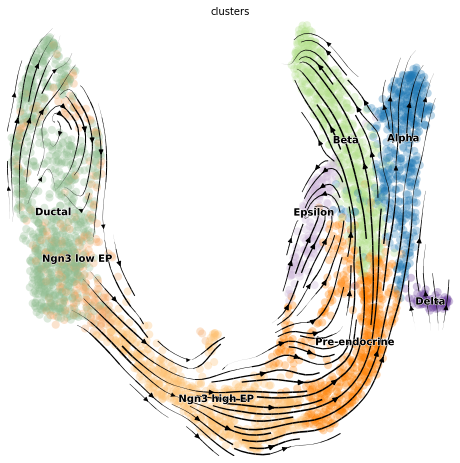

In [8]:
rcParams['figure.figsize'] = 8, 8

scv.pl.velocity_embedding_stream(adata, basis='umap')

In [9]:
scv.tl.rank_velocity_genes(adata, groupby='clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,Ductal,Ngn3 low EP,Ngn3 high EP,Pre-endocrine,Beta,Alpha,Delta,Epsilon
0,Notch2,Ptpn3,Pde1c,Pam,Pax6,Zcchc16,Zdbf2,Tmcc3
1,Sox5,Hacd1,Ptprs,Sdk1,Unc5c,Nlgn1,Spock3,Heg1
2,Krt19,Hspa8,Pclo,Baiap3,Nnat,Nell1,Akr1c19,Gpr179
3,Hspa8,Gm8113,Rap1gap2,Abcc8,Tmem108,Prune2,Ptprt,Ica1
4,Ano6,Kcnq1,Ttyh2,Gnas,Ptprt,Ksr2,Snap25,Ncoa7


In [20]:
adata.var.index[np.min(adata.layers['velocity'], axis=0)==0]

Index(['Sntg1', 'Fhl2', 'Sphkap', 'Nfasc', 'Cntnap5b', 'Tnr', 'Fmn2', 'Itpkb',
       'Sobp', 'Grik2', 'Ctnna3', 'Btbd11', 'Ntn4', 'Ccl9', 'Rgs9', 'Sdk2',
       'Slc43a2', 'Ccl4', 'Skap1', 'Dgkb', 'Chrm3', 'Adamts16', 'Gcnt2',
       'Phactr1', 'Cacna1d', 'Ptk2b', 'Cntn1', 'Gm609', 'Zdhhc14', 'Rps6ka2',
       'Crebrf', 'Nol4', 'Zbtb7c', 'Sorcs1', 'Apba1', 'Scn3a', 'Scn9a',
       'Wipf1', 'Pax6os1', 'Ptprt', 'Snap25', 'Nnat', 'Maml3', 'Tnik',
       'Kcnmb2', 'Unc5c', 'Fam219a', 'Nfib', 'Slc24a2', 'Plppr1', 'Kcnip4',
       'Kctd8', 'Dpp6', 'Ksr2', 'Gatsl2', 'Jazf1', 'Ptprz1', 'Tmem178b',
       'Ins2', 'Tshz3', 'Nell1', 'Kcnq1', 'Shank2', 'Tenm3', 'Spock3', 'Gnao1',
       'Tmem108', 'Rab27a', 'Aff2'],
      dtype='object', name='index')

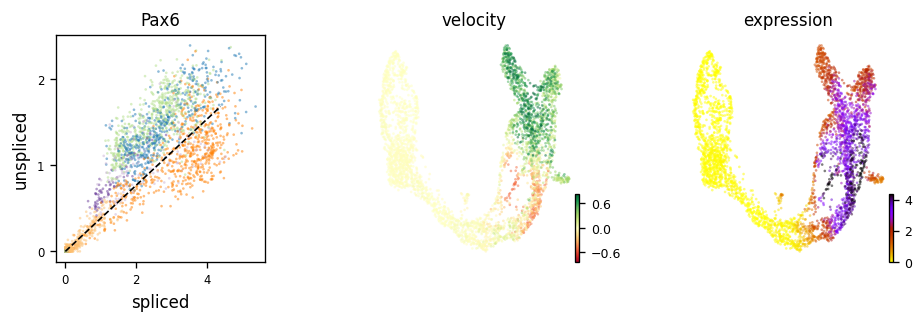

In [35]:
rcParams['figure.figsize'] = 6, 5 

scv.pl.velocity(adata, 
                ['Pax6'], 
                size=10, 
                fontsize=10,
                dpi=120,
                ncols=1)

## Marker Genes

In [12]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon')

In [42]:
list(adata.uns['rank_genes_groups']['names']['Epsilon'])[:10]

['Ghrl',
 'Isl1',
 'Maged2',
 'Rbp4',
 'Anpep',
 'Arg1',
 'Fam183b',
 'Card19',
 'Lrpprc',
 'Bex2']

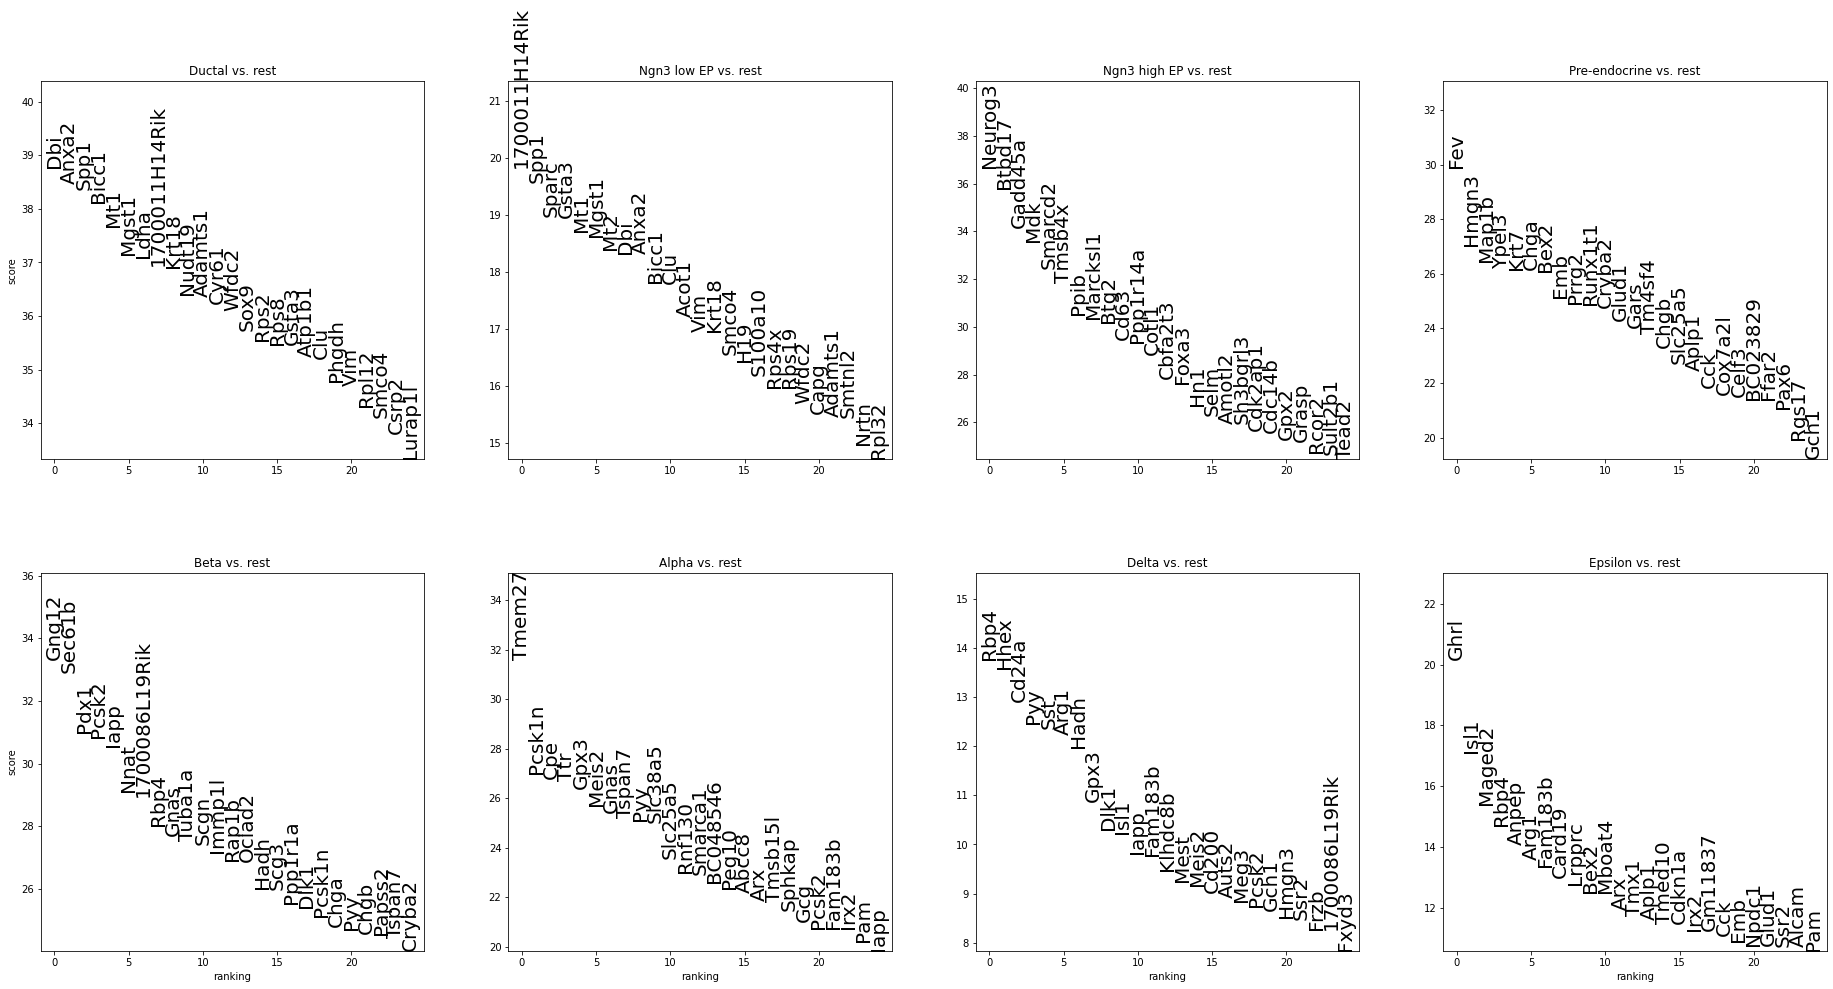

In [106]:
sc.pl.rank_genes_groups(adata, fontsize=20, n_genes=25, sharey=False)

## Subset Genes

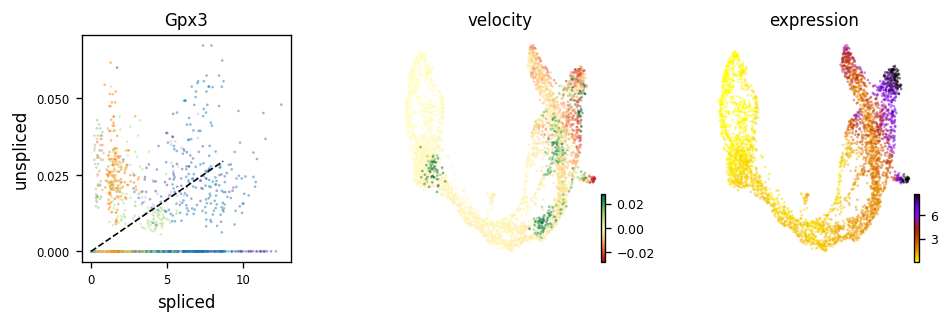

In [54]:
rcParams['figure.figsize'] = 6, 5

scv.pl.velocity(adata, 
                ['Gpx3'], 
                size=10, 
                fontsize=10,
                dpi=120,
                ncols=1)

In [15]:
list(adata.uns['rank_genes_groups']['names']['Alpha'])[:2]

['Tmem27', 'Pcsk1n']

In [51]:
scv.tl.velocity_graph(adata, 
#                       gene_subset=df['Beta'][:3]
                      gene_subset=list(adata.uns['rank_genes_groups']['names']['Delta'])[:5]
                     )

SURAG UNCOMMENTED velocity_graph.py
computing velocity graph
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


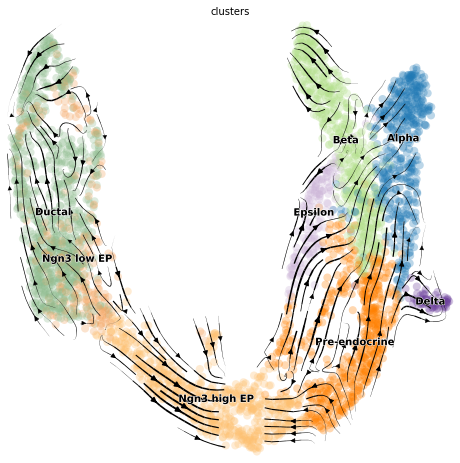

In [52]:
rcParams['figure.figsize'] = 8, 8

scv.pl.velocity_embedding_stream(adata, basis='umap')

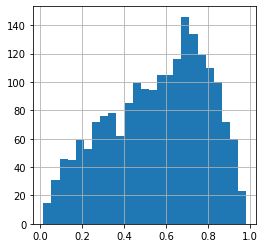

In [55]:
rcParams['figure.figsize'] = 4, 4
import pandas as pd
pd.DataFrame(adata.layers['velocity']>=0).mean(0).hist(bins=25)